In [1]:
import numpy as np
from keras.models import Sequential, model_from_json
from keras.layers import Dense , Activation
from keras.layers.advanced_activations import LeakyReLU
from keras import optimizers
from keras import callbacks

# 資料整理
data_restore = np.load('BikeSharingData/day.npy')
tr = data_restore [0:-100 ,:]
ts = data_restore [-100:,:]
mean = np.mean(tr , axis=0)
stdv = np.std(tr , axis=0)
tr = (tr - mean) / stdv
ts = (ts - mean) / stdv
x_train , y_train = tr[:, 0:11], tr[:, -1:]
x_test , y_test = ts[:,0:11 ,], ts[:, -1:]

# 模型設計
model = Sequential ([
Dense(6, input_shape =(11 ,)),
LeakyReLU(0.1),
Dense(6),
LeakyReLU(0.1),
Dense(1),])

# 指定減損函數，參數訓練方法
model.compile( optimizer='Adam' , loss='mean_squared_error')
# 保存架構
with open('my_network.json', 'w') as fout:
    fout.write(model.to_json())
# 保存參數
saver = callbacks.ModelCheckpoint('Model/keras_bike.epoch_{epoch:02d}.hdf5')
model.fit(x_train , y_train , epochs =15 , batch_size =4, callbacks=[saver])

Using TensorFlow backend.


Epoch 1/15
631/631 [==============================] - 0s - loss: 0.9012     
Epoch 2/15
631/631 [==============================] - 0s - loss: 0.5532     
Epoch 3/15
631/631 [==============================] - 0s - loss: 0.3090     
Epoch 4/15
631/631 [==============================] - 0s - loss: 0.2140     
Epoch 5/15
631/631 [==============================] - 0s - loss: 0.1760     
Epoch 6/15
631/631 [==============================] - 0s - loss: 0.1565     
Epoch 7/15
631/631 [==============================] - 0s - loss: 0.1444     
Epoch 8/15
631/631 [==============================] - 0s - loss: 0.1366     
Epoch 9/15
631/631 [==============================] - 0s - loss: 0.1319     
Epoch 10/15
631/631 [==============================] - 0s - loss: 0.1274     
Epoch 11/15
631/631 [==============================] - 0s - loss: 0.1238     
Epoch 12/15
631/631 [==============================] - 0s - loss: 0.1214     
Epoch 13/15
631/631 [==============================] - 0s - loss: 0.1191 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 6)                 72        
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 6)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 42        
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 6)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


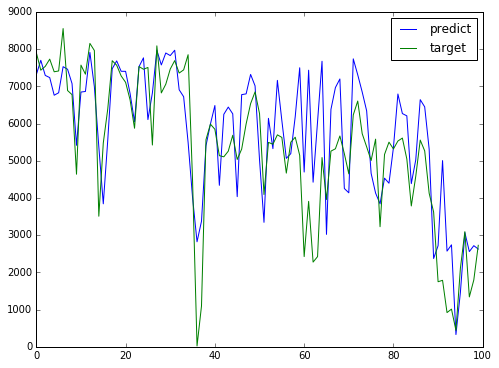

In [2]:
# 示範讀取模型
with open('my_network.json', 'r') as fin:
    my_json = fin.readline()

model2 = model_from_json(my_json)
model2.summary()
model2.load_weights('Model/keras_bike.epoch_14.hdf5')
# 輸入測試資料
y_pred = model2.predict(x_test)
cnt_pred = y_pred * stdv[-1] + mean[-1]
cnt_true = y_test * stdv[-1] + mean[-1]

# 繪圖
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [8,6]
day = range(100)
plt.plot(day , cnt_pred , label='predict')
plt.hold(True)
plt.plot(day , cnt_true , label='target')
plt.legend()
plt.show()